# Application of Deep Learning: CNN

<p style="font-weight:bold">DS-413 | 2023 First Semester</p>

Revamped by: Jhun Brian M. Andam \
From: Mr. Romen Samuel Wabina MSc. \
Department of Data Science \
College of Information Technology and Computing \
University of Science and Technology of Southern Philippines

- https://pytorch.org/tutorials/

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this section, we will introduce the **Convolutional Neural Network**, also known as CNN or ConvNets, as a better way for dealing with *image classification, detection, segmentation, computer vision, and other tasks involving image datasets*. We will also learn the image data and its composition. <br>

## Image Data

It is first important to define the **input shape of an image**, which will be <code>(input channels, image height, image width)</code>. Let's say given a image of 14 x 14 pixels = 196 features like this.  Each data point is an array of numbers describing how dark each pixel is, where value range from 0 to 255.  These values can be normalized ranging from 0 to 1.

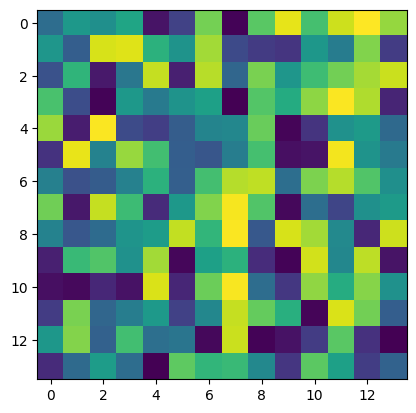

In [2]:
plt.imshow(np.random.randint(0,256, (14,14)))
plt.show()

In [3]:
# reading an image file using matplotlib
hagrid = plt.imread('figures/hagrid.jpg')
hagrid

array([[[ 33,  15,   5],
        [ 34,  17,   7],
        [ 35,  18,   8],
        ...,
        [ 42,  29,  12],
        [ 48,  35,  19],
        [ 47,  34,  18]],

       [[ 34,  16,   6],
        [ 34,  17,   7],
        [ 35,  18,   8],
        ...,
        [ 43,  30,  13],
        [ 45,  32,  16],
        [ 44,  31,  15]],

       [[ 37,  19,   9],
        [ 35,  18,   8],
        [ 34,  17,   7],
        ...,
        [ 44,  31,  14],
        [ 44,  31,  15],
        [ 43,  30,  14]],

       ...,

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [ 99,  73,  40],
        [ 98,  74,  38],
        [ 98,  74,  38]],

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [100,  74,  41],
        [ 96,  72,  38],
        [ 96,  72,  38]],

       [[  0,   2,   1],
        [  0,   2,   1],
        [  0,   2,   1],
        ...,
        [100,  74,  41],
        [ 96,  69,  39],
        [ 94,  69,  38]]

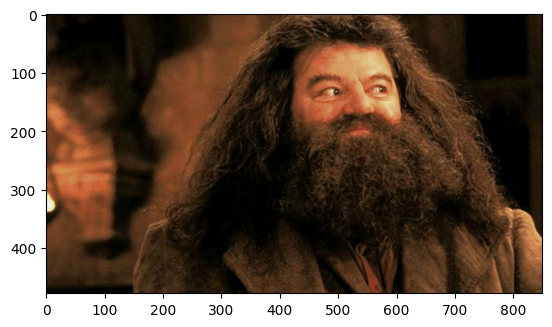

In [4]:
plt.imshow(hagrid);

In [5]:
h, w, c = hagrid.shape

print(f"height: {h}, width: {w}, channel: {c}")

height: 478, width: 850, channel: 3


An image data consists of the width and height of an image by pixel unit, another value that can be seen is the color channel of an image. 

> In the context of images, a "channel" refers to a specific component of the image's color information. Images are often composed of multiple channels, each representing different aspects of the image's appearance or color. The most common image channel representations are:
> * Grayscale (1-channel)
> * RGB: Red-Green-Blue (3-channel)
> * CMYK: Cyan-Magenta-Yellow-Key (4-channel)
> * HSV: Hue-Saturation-Value (3-channel)
> * RGBA: Red-Green-Blue-Alpha (4-channel)

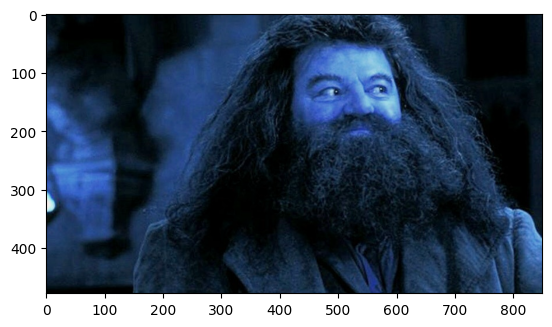

In [6]:
# reading image file using opencv
plt.imshow(cv2.imread("figures/hagrid.jpg"));

**NOTE**
* `matplotlib` resulting image follows an `RGB` format.
* `open-cv` resulting image follows `BGR` format.
* When using `open-cv`, you can use its built-in `cvtColor()` class to convert the color of an image.

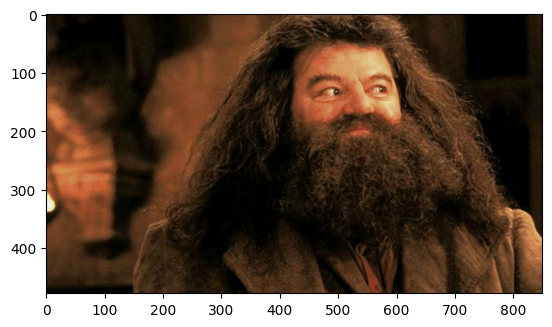

In [7]:
# cv2 image converted from BGR to RGB
plt.imshow(cv2.cvtColor(cv2.imread("figures/hagrid.jpg"), cv2.COLOR_BGR2RGB));

*How many color channels does this Dolores Umbridge image have?*

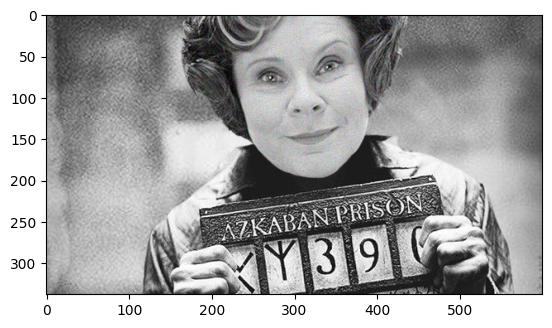

In [8]:
dolores = plt.imread('figures/dolores.jpg')
plt.imshow(dolores);

In [9]:
# print(dolores.shape)

> An image that appears to be black and white or grayscale with literal hues of gray, white, and black color typically has three channels due to the way color images are represented in digital form. 


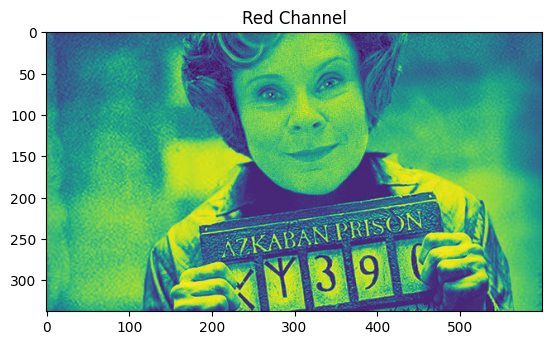

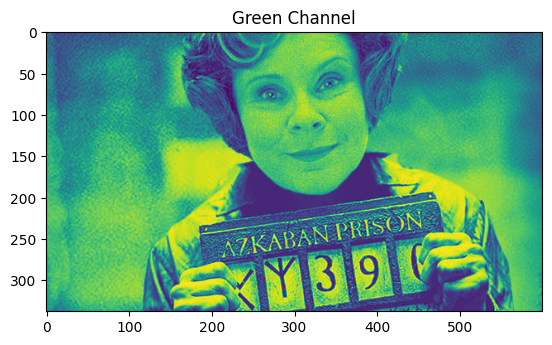

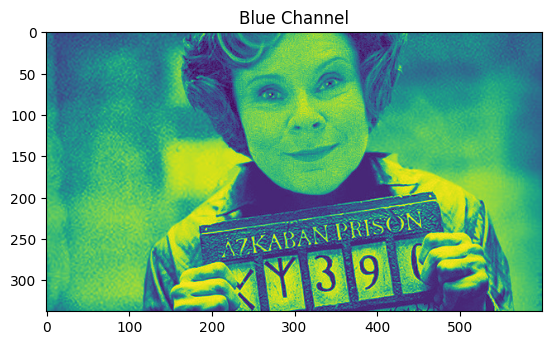

In [10]:
for channel, color in zip(range(3), ['Red', 'Green', 'Blue']):
    plt.imshow(dolores[:, :, channel])
    plt.title(f"{color} Channel")
    plt.show();

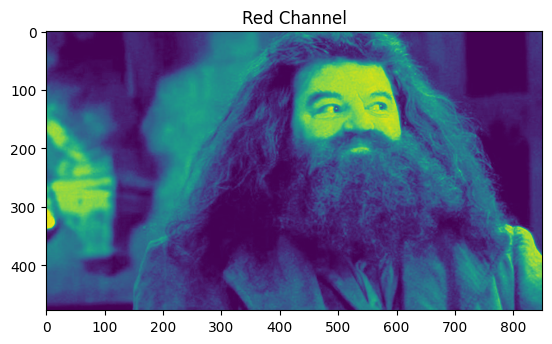

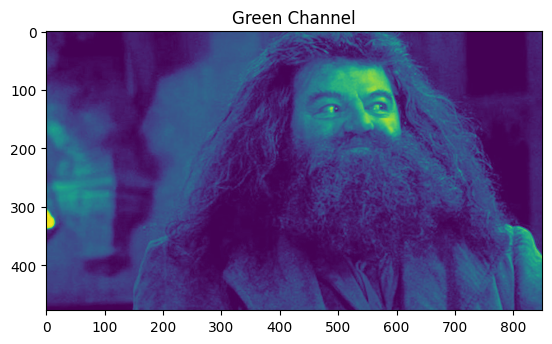

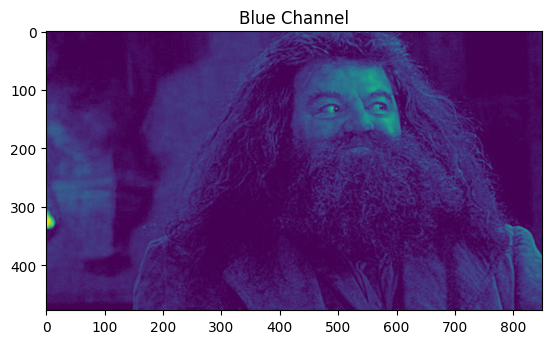

In [11]:
for channel, color in zip(range(3), ['Red', 'Green', 'Blue']):
    plt.imshow(hagrid[:, :, channel])
    plt.title(f"{color} Channel")
    plt.show();

**Reshaping image data is just like reshaping an array or a matrix.**


> `Resize can increase or decrease the size of the image`. For example, you can resize image from 100x100 to 20x20. `Reshape changes the shape of the image without changing the total size.` For example, you can reshape image from 100x100 to 10x1000 or to 1x100x100.
> - Answered by Andrey Lukyanenko (Stack Overflow)



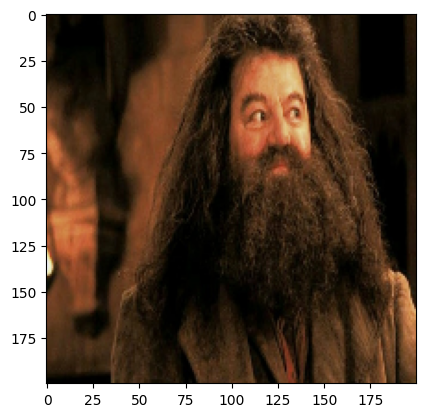

In [12]:
# stretchy Hagrid!
plt.imshow(cv2.resize(hagrid, (200, 200)));

**REMEMBER**

When you resize an image, the visible features can be stretched or distorted, and it's crucial to consider the implications of this operation.
<br></br>

> *"Imagine you're teaching a magical creature recognition spell to your model using peculiar, twisted images of Hagrid. If you only show it these odd, distorted versions of everyone's favorite half-giant, your model might become so enchanted by these peculiarities that it'll fumble and misfire when confronted with the true, undistorted Hagrid! Remember, in the world of AI, `your model can only learn what you teach it`, so make sure it's learning from the right magical scrolls!"*






## Convolutional Neural Network

- The CNNs emerged from the study of the brain's visual cortex, and have been used in image recognition since 1980s.
- CNNs are also successful in implementing voice recognition and natural language processing, However, **we will focus on visual applications for now.**
  
**Why CNN?**

*Image data are well-suited for training with Convolutional Neural Networks (CNNs) because images can be represented as matrix-like data, allowing CNNs to effectively capture spatial patterns and hierarchical features within the data.*

## 1. Convolution Layer

The most important building block of a CNN is the **convolutional layer**. It is a mathematical operation that *slides* one function over another and measures the integral of their pointwise multiplication. Convolutional network works on the central concept of a convolution operation like this:

<img src ="figures/no_padding_no_strides.gif" width="150">

Mathematically, it looks like this:

Let's say we have a 5 x 5 input image $I$ of channel 0 of batch 0. Hence, its shape is <code>(0, 0, 5, 5)</code>:

$$ I = \begin{bmatrix}
i_{11} & i_{12} & i_{13} & i_{14} & i_{15}
\\
i_{21} & i_{22} & i_{23} & i_{24} & i_{25}
\\
i_{31} & i_{32} & i_{33} & i_{34} & i_{35}
\\
i_{41} & i_{42} & i_{43} & i_{44} & i_{45}
\\
i_{51} & i_{52} & i_{53} & i_{54} & i_{55}
\end{bmatrix}
$$

Each of this pixel may represent the brightness ranging from 0 to 255.  Or if normalized, shall be 0 to 1.

If we define a 3 x 3 patch which we commonly called **weights (W)** or in computer vision, we called **filters/kernels** like this (*we shall called filters in this lecture note for simplicity*) :

$$ W = \begin{bmatrix}
w_{11} & w_{12} & w_{13}
\\
w_{21} & w_{22} & w_{23}
\\
w_{31} & w_{32} & w_{33}
\end{bmatrix}
$$

Let's say we are scanning the middle of the image, then the output feature would be (we'll denote this as $o_{33}$):

$$output_{33} = w_{11} \cdot i_{22} + w_{12} \cdot i_{23} + w_{13} \cdot i_{24} + w_{21} \cdot i_{32} + w_{22} \cdot i_{33} + w_{23} \cdot i_{34} + w_{31} \cdot i_{42} + w_{32} \cdot i_{43} + w_{33} \cdot i_{44}$$
           
This will result in one output feature called **feature map**.  Of course, we may add bias to it and then will be fed through an activation function.

Actual feature maps look like this.  Each feature map is a output of a single training example and convolve each kernel over the sample.    In simple words, if we have $k$ filters, then we have $k$ feature maps.  They represent the activation part corresponding to the kernels.

<img src ="figures/feature-map2.png" width="450">

Using the example above, we apply the filters to the picture of Hagrid. 

<img src ="figures/filter.jpg" width="550">

In using PyTorch, we primarily use the script <code>torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride = 1, padding = 0)</code>

In a convolution operation, there are 3 main hyperparameters to fine tune - (1) filter size (<code>kernel_size</code>), (2) padding, and (3) stride.

#### A. Filters

1. **How the filters look like?**.  It turns out that each filter actually detect the presence of certain visual pattern.  For example, this filter below detects whether there is an edge at that location of the image.  There are also other similar filters detecting corners, lines, etc.  Check out https://setosa.io/ev/image-kernels/  and try changing the values

$$ w = \begin{bmatrix}
0 & 1 & 0
\\
1 & -4 & 1
\\
0 & 1 & 0
\end{bmatrix}
$$

Real filters can look like this.  They may look somewhat random at first glance, but we can see that clear structure being learned in most kernels. For example, filters 3 and 4 seem to be learning diagonal edges in opposite directions, and other capture round edges or enclosed spaces:

<img src ="figures/kernels.png" width="500">

However, **it is important to note that we DON'T need to decide the filters** to use.  We can simply feed a random generated filter, and it is the job of CNN to learn these filters.   These learned filters will learn what features are most efficient for the classification process.

**What is the shape of filters?**.  
- For each image, we can apply multiple filters, depending on how many output channels we want.  
- Let's say the input channel is 3, and we want the output channel to 64, then we apply a filter of size <code>(3, 64, filter width, filter height)</code>.
- Hence, <code>torch.nn.Conv2d(3, 64, filter width, filter height)</code> 
- Do not be confused with the <code>Conv2d</code> and PyTorch image shape. 
    - Conv2d: <code>torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride = 1, padding = 0)</code>
    - <code>(input channels, image height, image width)</code>

**How do we know how many output channel to use?** 
- The answer is we don't know...we just try and see what works.  More filter allows the network to look at more patterns.

**What should be the filter size?**  <br>
- If we use a 3 x 3 filter, each pixel got 8 neighboring information.  On the other hand, if we we use big filter like 9 x 9, then we got 80 neighboring information.  
- In research and the industry, the typical filter sizes are $3 \times 3$ or $5 \times 5$.


#### B. Padding

2. **How should we convolve the edges?**. Recall this image:

<img src ="figures/no_padding_no_strides.gif" width="150">

It has 4 x 4 pixels = 16 features.  But after convolution, we only got 2 x 2 pixels = 4 features left.  Is that good?  There are no correct answers here but we are quite sure that we lose some information.  One way to address this is **padding**, where we can enlarge the input image by padding the surroundings with zeros.  How much?  Padding until we get the original size or larger size, for example, like this.  The below put zero padding around which result the output features to be the same size as input features.

<img src ="figures/same_padding_no_strides.gif" width="150">

The below put even more padding which pad to make sure each single pixel is convoluted (full padding), which result the output features to be even large

<img src ="figures/full_padding_no_strides.gif" width="150">

#### C. Strides

3. **How many step we should take to slide our filter? Skip 2?** Should we shift 1 step per convolution, or 2 steps, or how many steps.  **In fact, it really depends on how detail you want it to be.  But defining bigger steps reduce the feature size and thus reduce the computation time.**  Bigger step is like human scanning picture more roughly but can reduce the computation time....whether to use it is something to be experimented though. 

In computer vision, we called this step as **stride**.  Example is like this:

**No padding with stride of 2**

<img src ="figures/no_padding_strides.gif" width="150">

**Padding with stride of 2**

<img src ="figures/padding_strides.gif" width="150">

Actual image convolution can look like this (with stride 1 and no padding):

<img src ="figures/conv.gif" width="800">

The convoluted image may look like this (nothing relate with the above matrix though):

<img src ="figures/convimages.png" width="700">

**The formula to be used to measure the padding value to get the spatial size of the input and output volume to be the same with stride 1** is

$$ \frac{K-1}{2} $$

where $K$ is the filter size.

This means that if our image is size $24 * 24$, and the filter size is $3 x 3$, then our $K$ has size 3 so the padding should be $(3-1)/2 = 1$, then we need to add **a border of one pixel valued 0 around the outside of the image**, which would result in the input image of size $26 * 26$

#### D. Shape

4. **What would be the shape of the output matrix?**

The output shape (denote as $O$) depend on the stride (denote as $S$), padding (denote as $P$), filter size (denote as $F$) as well as the input width and height (denote as $I$). $O$ can be calculated with the formula as follows:

$$O = \frac{W-F+2P}{S} + 1$$

In this case (code below), if our W is 28, F is 5, P is 2, and S is 1 then the width/height is 28

In conclusion, 

- The input will have a 4D shape of <code>(batch size, input channels, input height, input width)</code>

- The output will have a 4D shape of <code>(batch size, output channels, output height, output width)</code>

- The convolutional filters will have 4D shape of <code>(input channels, output channels, filter height, filter width)</code>

## 2. Max/Average Pooling Layer

Talking about **reducing computation time**, a common way is to perform a **pooling layer** which simply downsample the image by average a set of pixels, or by taking the maximum value.  If we define a pooling size of 2, this involves mapping each 2 x 2 pixels to one output, like this:

<img src ="figures/pooling.png" width="350">

Nevertheless, pooling has a really big downsides, i.e., it basically lose a lot of information.  Compared to strides, strides simply scan less but maintain the same resolution but pooling simply reduce the resolution of the images.

As Geoffrey Hinton said on Reddit AMA in 2014 - **The pooling operation used in CNN is a big mistake and the fact that it works so well is a disaster**.  In fact, in most recent CNN architectures like ResNets, it uses pooling very minimially or not at all.

The maximum pooling layer for 2D images over an input signal can be used through this script: <code>torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)</code> <br>

<img src ="figures/pooling2.png" width="850">

## 3. BatchNorm Layer

Batch norm is nothing other than normalize samples within the batch.  That is, minus the mean of features within the batch.  This helps with unstable gradients in SGD. Note that the output size does not change from input size after BatchNorm.

<img src ="figures/batchnorm.png" width="300">

<img src ="figures/landscape.png" width="500">

**Advantages**

1. Speeds up training
2. Allows sub-optimal starts
3. Acts as a regularizer (a little)
    - https://youtu.be/DtEq44FTPM4?t=372

## 4. Dropout Layer

This is a layer of arbitrarily removing some values in your data.  By randomly removing data in each iteration, you make the neural network more robust against overfitting, because it needs to learn to fight with incomplete data.

For example, say we have a vector of $x = {1, 2, 3, 4, 5}$.  Let's set $p=0.2$ which means 20\% of data will be turn to 0.  In training mode, $x_\text{train} = {1, 0, 3, 4, 5}$ ; do not confuse why I turn off 2 and not others, I just turn 20\% off randomly.  In evaluation mode, we turn off dropout, but to make sure the distribution remains similar, we multiply the values by $1 - 0.2 = 0.8$, which becomes $x_\text{inference} = {0.8, 1.6, 2.4, 3.2, 4.0}$